In [1]:
# этот ноутбук относится к лабе 3.5.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# 1 пункт измерения
a = pd.DataFrame() # увеличение тока

a['i'] = ( # mA
  1.56,  2.00,  2.25, 2.501, 3.011, 3.292, 3.539, 3.740, 3.879, 4.093
)

a['v'] = ( # V
  30.70, 27.65, 26.42, 24.07, 21.53, 21.09, 20.09, 19.04, 18.24, 16.93
)

b = pd.DataFrame() # уменьшение

b['i'] = ( # mA
  4.123, 3.818, 3.463, 3.107, 2.797, 2.446, 2.034, 1.759, 1.497, 1.249
)

b['v'] = ( # V
  16.53, 18.30, 20.03, 20.83, 22.15, 24.18, 26.99, 28.75, 30.91, 33.00
)



In [3]:
# 2 пункт измерения, ток рараяда: 5мА
a = pd.DataFrame() # уменьшение напряжения, положительный дипапазон
a['i'] = ( # \mu A
  118.25, 115.97, 113.15, 108.08, 099.55, 087.60, 077.32, 065.12, 053.32, 036.65, 22.16
)

a['v'] = ( # V
  25.030, 21.957, 18.983, 16.039, 13.023, 10.092, 08.078, 05.998, 04.117, 02.010, 00.48
)

b = pd.DataFrame() # уменьшение напряжения, отрицательный дипапазон

b['i'] = ( # \muA
  018.14, 030.90, 050.47, 061.39, 075.67, 088.06, 100.88, 111.79, 118.90, 122.87, 125.49
)

b['v'] = ( # V
  00.522, 2.0914, 4.440,  06.023, 08.292, 10.477, 13.197, 16.266, 19.316, 22.154, 25.040
)



In [4]:
# 2 пункт измерения, ток рараяда: 3мА
aa = pd.DataFrame() # уменьшение напряжения, положительный дипапазон
aa['i'] = ( # \mu A
  062.94, 061.26, 059.38, 056.88, 053.06, 047.25, 040.73, 034.24, 025.58, 016.09, 007.71
)

aa['v'] = ( # V
  25.040, 22.109, 19.064, 16.191, 13.334, 10.449, 08.067, 06.172, 04.051, 02.101, 00.526
)

bb = pd.DataFrame() # уменьшение напряжения, отрицательный дипапазон

bb['i'] = ( # \muA
  006.02, 014.00, 024.87, 032.92, 041.57, 047.07, 053.68, 058.15, 060.56, 062.87, 064.78
)

bb['v'] = ( # V
  00.526, 02.023, 04.149, 06.068, 08.444, 10.303, 13.187, 15.995, 18.186, 21.236, 24.433
)

In [5]:
# 2 пункт измерения, ток рараяда: 1.5мА
aaa = pd.DataFrame() # уменьшение напряжения, положительный дипапазон
aaa['i'] = ( # \mu A
  028.29, 027.37, 026.45, 025.48, 024.13, 022.01, 019.70, 016.51, 012.46, 006.76, 002.22
)

aaa['v'] = ( # V
  25.041, 22.078, 19.104, 16.156, 13.018, 10.100, 08.122, 06.144, 04.209, 02.037, 0.489
)

bbb = pd.DataFrame() # уменьшение напряжения, отрицательный дипапазон

bbb['i'] = ( # \muA
  001.44, 006.72, 011.63, 016.22, 020.05, 022.54, 025.02, 026.41, 027.43, 028.45, 029.38
)

bbb['v'] = ( # V
  00.486, 02.265, 04.061, 06.059, 08.209, 10.152, 13.243, 16.221, 19.148, 22.242, 25.041
)

9 R_max coefs:   
9.471 x + 17.61
0 R_min coefs:   
0.7419 x + 99.68


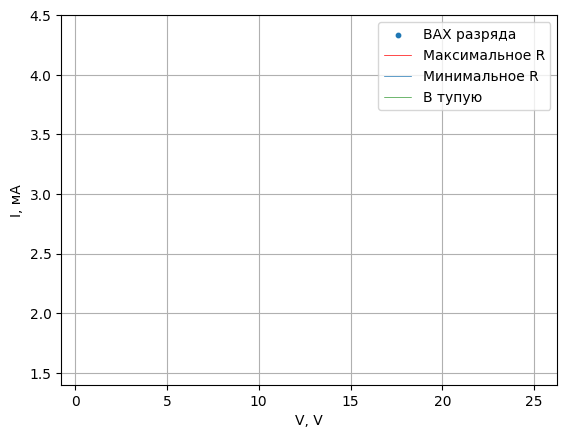

In [6]:
# график пункт 1

# график
ox = a['v']
oy = a['i']

plt.scatter(
  ox,
  oy,
  s=10,
  label="ВАХ разряда"
)
 # индекс, на котором наклон максимальный
r = np.argmax(np.diff(a['i']) / np.diff(a['v']))
coefs = np.polyfit((a['v'][r], a['v'][r+1]), (a['i'][r], a['i'][r+1]), 1)
poly = np.poly1d(coefs)
plt.plot(ox, poly(ox), 'r-', linewidth=0.5, label="Максимальное R")
print(r, f"R_max coefs:  {poly}" )


 # индекс, на котором наклон максимальный
r = np.argmin(np.diff(a['i']) / np.diff(a['v']))
coefs = np.polyfit((a['v'][r], a['v'][r+1]), (a['i'][r], a['i'][r+1]), 1)
poly = np.poly1d(coefs)
plt.plot(ox, poly(ox), '-', linewidth=0.5, label="Минимальное R")
print(r, f"R_min coefs:  {poly}" )


z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1)
plt.plot(ox, p1(ox), linewidth=0.4, color='green', linestyle='-', label='В тупую')
# print(str(p1), "eror:", res[0][0] ** 0.5/((z1[0])**2))
plt.xlabel("V, V")
plt.ylabel("I, мА")
plt.grid()
plt.ylim(bottom=1.4, top=4.5)
plt.legend(loc='best')
plt.savefig("p1.png")
plt.show()

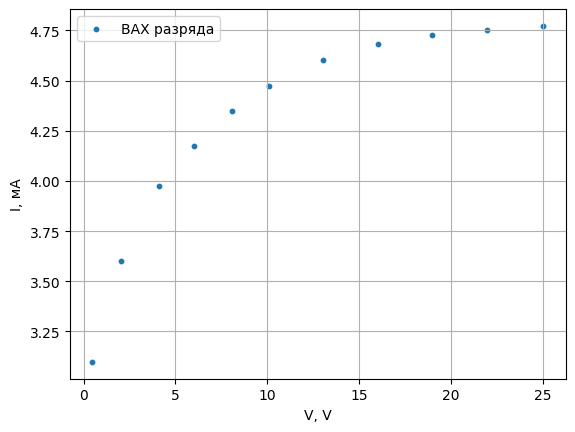

In [7]:
# график пункт 1 в логарифмических координатах

# график
ox = a['v']
oy = a['i']

plt.scatter(
  ox,
  np.log(oy),
  s=10,
  label="ВАХ разряда"
)

# print(str(p1), "eror:", res[0][0] ** 0.5/((z1[0])**2))
plt.xlabel("V, V")
plt.ylabel("I, мА")
plt.grid()
plt.legend(loc='best')
plt.savefig("p1_log.png")
plt.show()

Токи насыщения: 91.085 mA, -87.684 mA, разница: 3.7%
Наклон: 8.528, 8.258, разница: 3.2%
delta u: 8.5,  -8.95


Токи насыщения: 46.16 mA, -46.13 mA, разница: 0.1%
Наклон: 5.062, 5.197, разница: -2.7%
delta u: 8.09,  -8.23


Токи насыщения: 20.399 mA, -20.975 mA, разница: -2.8%
Наклон: 2.744, 2.85, разница: -3.9%
delta u: 7.07,  -7.32




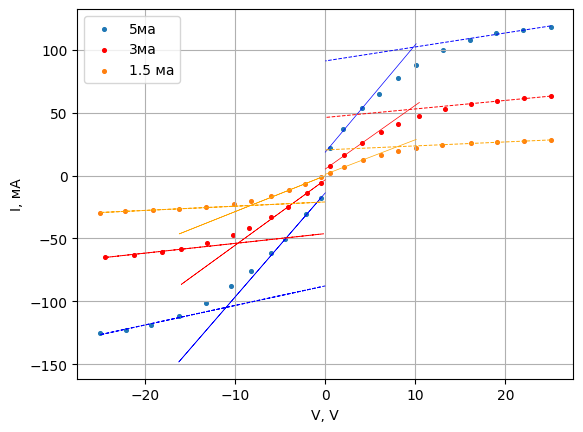

In [8]:
# график пункт 2
oy = (tuple(a['i']) + tuple(-1 * b['i']))
ox = tuple(a['v']) + tuple(-1 * b['v'])
oyy = tuple(aa['i']) + tuple(-1 * bb['i'])
oxx = tuple(aa['v']) + tuple(-1 * bb['v'])
oyyy = tuple(aaa['i']) + tuple(-1 * bbb['i'])
oxxx = tuple(aaa['v']) + tuple(-1 * bbb['v'])
plt.scatter(
  ox,
  oy,
  s=7,
  label="5ма"
)
plt.scatter(
  oxx,
  oyy,
  s=7,
  label="3ма", 
  color='red'
)
plt.scatter(
  oxxx,
  oyyy,
  s=7,
  label="1.5 ма"
)
i_nas = []

for x, y, i, c in ((ox, oy, 5, "blue"), (oxx, oyy, 3, "red"), (oxxx, oyyy, 1.5, "orange")):
  p1 = np.poly1d(np.polyfit(x[:4], y[:4], 1))
  plt.plot(tuple((i for i in x if i >=0)) + (0,), p1(tuple(i for i in x if i >=0) + (0,)), linewidth=0.7, color=c, linestyle='--')
  iplus = round(p1[0], 3)

  p2 = np.poly1d(np.polyfit(x[-4:], y[-4:], 1))
  plt.plot(tuple((i for i in x if i <=0)) + (0,), p2(tuple(i for i in x if i <=0) + (0,)), linewidth=0.7, color=c, linestyle='--')
  iminus = round(p2[0], 3)

  print(f"Токи насыщения: {iplus} mA, {iminus} mA, разница: {round(100 * (iplus + iminus)/iplus, 1)}%")
  i_nas.append((iplus - iminus)/2)

  p3 = np.poly1d(np.polyfit(x[8:11], y[8:11], 1))
  plt.plot(x[5:11] + (0,), p3(x[5:11]+ (0,)), linewidth=0.5, color=c, linestyle='-')
  uplus = round(p3[1], 3)

  p4 = np.poly1d(np.polyfit(x[11:14], y[11:14], 1))
  plt.plot(x[11:19] + (0,), p4(x[11:19]+ (0,)), linewidth=0.5, color=c, linestyle='-')
  uminus = round(p4[1], 3)

  print(f"Наклон: {uplus}, {uminus}, разница: {round(100 * (uplus - uminus)/uplus, 1)}%")

  deltau_plus = (p3 - iplus).roots 
  deltau_minus = (p4 - iminus).roots 
  print(f"delta u: {round(deltau_plus[0], 2)},  {round(deltau_minus[0], 2)}")
  print("\n")



plt.xlabel("V, V")
plt.ylabel("I, мА")
plt.grid()
plt.legend(loc='best')
plt.savefig("p2.png")
plt.show()

dI/dU|U=0 8.528 mA/V, 8.258 mA/v, разница: 3.2%


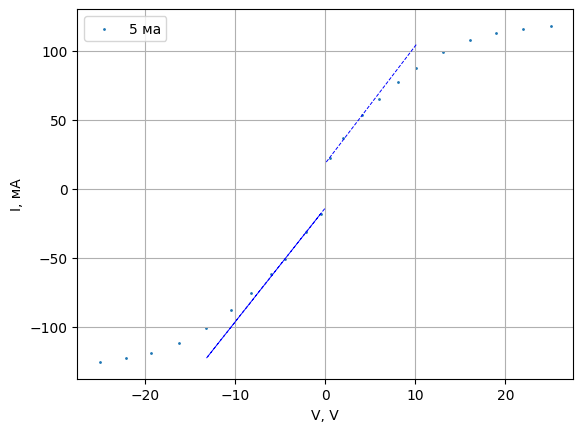

dI/dU|U=0 5.062 mA/V, 5.197 mA/v, разница: -2.7%


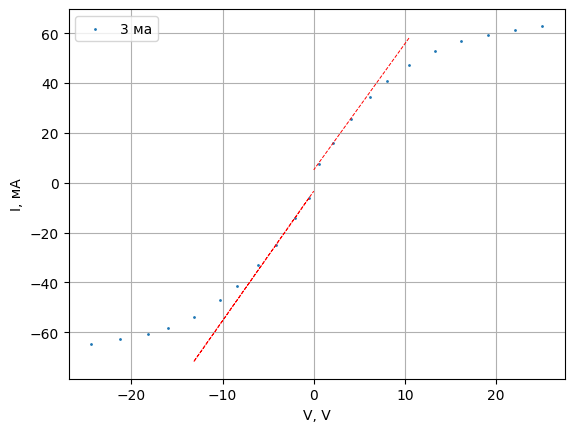

dI/dU|U=0 2.744 mA/V, 2.85 mA/v, разница: -3.9%


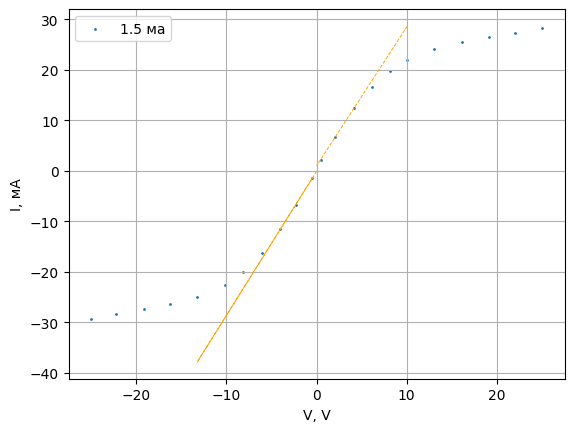

In [18]:
# график пункт 2
oy = (tuple(a['i']) + tuple(-1 * b['i']))
ox = tuple(a['v']) + tuple(-1 * b['v'])
oyy = tuple(aa['i']) + tuple(-1 * bb['i'])
oxx = tuple(aa['v']) + tuple(-1 * bb['v'])
oyyy = tuple(aaa['i']) + tuple(-1 * bbb['i'])
oxxx = tuple(aaa['v']) + tuple(-1 * bbb['v'])

didu = []

for x, y, i, c in ((ox, oy, 5, "blue"), (oxx, oyy, 3, "red"), (oxxx, oyyy, 1.5, "orange")):
  # x = np.sort(x)
  # y = np.sort(y)
  plt.scatter(
    x,
    y,
    s=7,
    label=f"{i} ма"
  )
  p1 = np.poly1d(np.polyfit(x[8:11], y[8:11], 1))
  plt.plot(x[5:11] + (0,),  p1(x[5:11] + (0,)),  linewidth=0.7, color=c, linestyle='--')
  iplus = round(p1[1], 3)

  p2 = np.poly1d(np.polyfit(x[11:14], y[11:14], 1))
  plt.plot(x[11:18] + (0,), p2(x[11:18] + (0,)), linewidth=0.7, color=c, linestyle='--')
  iminus = round(p2[1], 3)

  print(f"dI/dU|U=0 {iplus} mA/V, {iminus} mA/v, разница: {round(100 * (iplus - iminus)/iplus, 1)}%")
  didu.append((iplus + iminus)/2)

  plt.xlabel("V, V")
  plt.ylabel("I, мА")
  plt.grid()
  plt.legend(loc='best')
  plt.savefig(f"отдельный график {i}мА.png")
  plt.show()

# k = 1.38*10**-23

In [10]:
# константы
K = 1.38* 10**-23
e = 1.6 * 10**-19
d = 0.2 * 10**-3
l = 5.2 * 10**-3
mi= 22*1.66*10**-27
me= 9.1*10**-31

In [11]:
#T_e
i_nas_ = pd.DataFrame(i_nas) * 10**-3
didu_ = pd.DataFrame(didu) * 10**-3
T = 0.5 * e * (K)**-1 * i_nas_ / didu_
T.round()

,0
0,61738.0
1,52151.0
2,42876.0


In [12]:
i_nas_

,0
0,0.089385
1,0.046145
2,0.020687


In [13]:
n_e = i_nas_ / (0.4*e*np.pi * np.sqrt(2*K*T/mi))
# print(n_e.round().to_latex())
n_e

,0
0,6.508266e+13
1,3.655741e+13
2,1.807468e+13


In [14]:
# w = np.sqrt(4*np.pi*n_e*e**2 / me)
w = 5.6*10**-4*np.sqrt(n_e)
print(w.round(0).to_latex())

\begin{tabular}{lr}
\toprule
{} &       0 \\
\midrule
0 &  4518.0 \\
1 &  3386.0 \\
2 &  2381.0 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_350608/64806974.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(w.round(0).to_latex())


In [15]:
r_de=np.sqrt(K*T/(4*np.pi*n_e*(e**2)))
print(r_de)
r_d=np.sqrt(K*300/(4*np.pi*n_e*(e**2)))
print(r_de.to_latex(), '\n', r_d.to_latex())

            0
0  201.725101
1  247.375789
2  318.997540
\begin{tabular}{lr}
\toprule
{} &           0 \\
\midrule
0 &  201.725101 \\
1 &  247.375789 \\
2 &  318.997540 \\
\bottomrule
\end{tabular}
 
 \begin{tabular}{lr}
\toprule
{} &          0 \\
\midrule
0 &  14.061855 \\
1 &  18.762364 \\
2 &  26.683328 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_350608/1238188790.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(r_de.to_latex(), '\n', r_d.to_latex())


In [16]:
N_d=(4/3)*np.pi*r_d**3*n_e
N_d

,0
0,7.580219e+17
1,1.011409e+18
2,1.438398e+18


In [17]:
# P = 2мм рт ст
P = 267
alpha = n_e / (P/(K*300))
alpha

,0
0,1.009147e-09
1,5.668452e-10
2,2.802590e-10
